<div style="padding:25px;color:white;margin:20;font-size:100%;text-align:center;display:fill;overflow:hidden;">
    <b>
        <span style='color:Black; font-size:45px;'>
        <u>TITANIC SURVIVAL PREDICTION</u>
    </span>
    </b>
</div>


<div style="margin:10px" >
    <img src= "https://assets.editorial.aetnd.com/uploads/2012/04/sinking-of-the-titanic-gettyimages-542907919-1.jpg?width=1920&height=960&crop=1920%3A960%2Csmart&quality=75">
</div>

<div style="text-align:center;margin:40px;" >
    <span style="border:3px solid black; padding:10px;color:white;margin:10px;font-size:100%;display:fill;border-radius:30px;overflow:hidden; color:purple;font-weight:bold; font-size:40px;">About</span>
</div>

<div style="margin:1px;" >
    <p style="font-weight:bold; font-size:18px;">
The standard Titanic dataset will be used to do analysis and model building. In order to predict the survival of these passengers, the data includes demographic and travel details for 418 Titanic passengers.Details on each passenger's general information and travel history are included in this dataset.
    </p>
</div>

<ol style="font-weight:bold; font-size:18px;">
<li> Pclass: Passenger travelling in class (1 = 1st; 2 = 2nd; 3 = 3rd)</li>
<li> Survival: A Boolean indicating whether the passenger survived or not (0 = No; 1 = Yes); this is to be predicted</li>
<li> Name: Contains title and family names</li>
<li> Sex: Gender of passenger (male/female) </li>
<li> Age: Age</li>
<li> Sibsp: Number of siblings/spouses aboard</li>
<li> Parch: Number of parents/children aboard</li>
<li> Ticket: Ticket number.</li>
<li> Fare: Passenger fare ( In British Pound).</li>
<li> Cabin: Cabin number</li>
<li> Embarked: Port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)</li>
 </ol>

 <div style="margin:40px;text-align:left;" >
    <span style="display:fill;overflow:hidden; color:purple;font-weight:bold; font-size:50px;"><u>Objective</u> : <span style="display:fill;overflow:hidden; color:Red;font-size:25px;">To create a predictive model using machine learning (ML) that can, given the available data, predict a passenger's survival as precisely as feasible.</span></span>
</div>
 

 <div style="text-align:center;margin:40px;" >
    <span style="border:3px solid black; padding:10px;color:white;margin:10px;font-size:100%;display:fill;border-radius:30px;overflow:hidden; color:blue;font-weight:bold; font-size:40px;"> STEP-1 : Importing Libraries</span>
</div>
 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from matplotlib import colors

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


 <div style="text-align:center;margin:40px;" >
    <span style="border:3px solid black; padding:10px;color:white;margin:10px;font-size:100%;display:fill;border-radius:30px;overflow:hidden; color:blue;font-weight:bold; font-size:40px;"> STEP-2 : Reading Dataset</span>
</div>

In [2]:
df = pd.read_csv('Titanic_dataset.csv')


 <div style="text-align:center;margin:40px;" >
    <span style="border:3px solid black; padding:10px;color:white;margin:10px;font-size:100%;display:fill;border-radius:30px;overflow:hidden; color:blue;font-weight:bold; font-size:40px;"> STEP-3 : Exploratory Data Analysis(EDA)</span>
</div>

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [5]:
df.shape

(418, 12)

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())

In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [10]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [11]:
Embarked = df['Embarked'].unique()
for Embarkeds in Embarked:
    print("->",Embarkeds)

-> Q
-> S
-> C


In [12]:
Survived = df['Survived'].unique()
for Survives in Survived:
    print("->",Survives)

-> 0
-> 1


In [13]:
df['Embarked'] = df['Embarked'].map( {'Q': 0,'S':1,'C':2}).astype(int)
df['Sex'] = df['Sex'].map( {'female': 1,'male':0}).astype(int)

In [14]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int32
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked         int32
dtype: object

In [15]:
df['Age'] = df['Age'].astype(int)
df['Fare'] = df['Fare'].astype(int)

In [16]:
df.dtypes

PassengerId     int64
Survived        int64
Pclass          int64
Name           object
Sex             int32
Age             int32
SibSp           int64
Parch           int64
Ticket         object
Fare            int32
Cabin          object
Embarked        int32
dtype: object

In [17]:
df.drop(['PassengerId','Name','Cabin','Ticket'], axis=1, inplace=True)

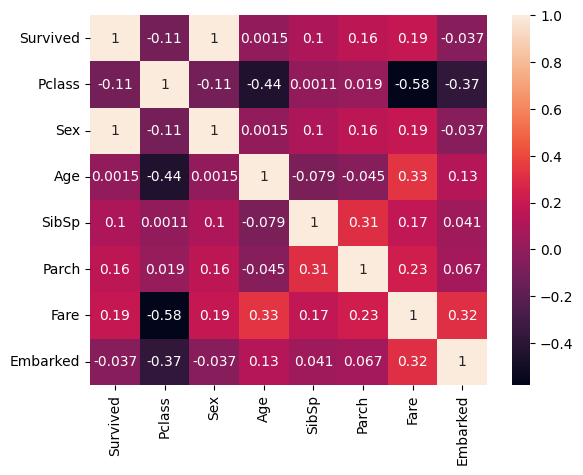

In [18]:
corr_matrix = df.corr()

hm = sns.heatmap(data=corr_matrix,annot=True)


In [19]:
a = df['Sex']
b = df['Survived']
corr = np.corrcoef(a,b)[0,1]
print("Correlation coefficient : ", corr)


Correlation coefficient :  1.0


In [20]:
df.drop(['Sex'], axis=1, inplace=True)

In [21]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
0,0,3,34,0,0,7,0
1,1,3,47,1,0,7,1
2,0,2,62,0,0,9,0
3,0,3,27,0,0,8,1
4,1,3,22,1,1,12,1


In [22]:
df.tail()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
413,0,3,30,0,0,8,1
414,1,1,39,0,0,108,2
415,0,3,38,0,0,7,1
416,0,3,30,0,0,8,1
417,0,3,30,1,1,22,2


 <div style="text-align:center;margin:40px;" >
    <span style="border:3px solid black; padding:10px;color:white;margin:10px;font-size:100%;display:fill;border-radius:30px;overflow:hidden; color:blue;font-weight:bold; font-size:40px;"> STEP-4 : Data Visualization</span>
</div>

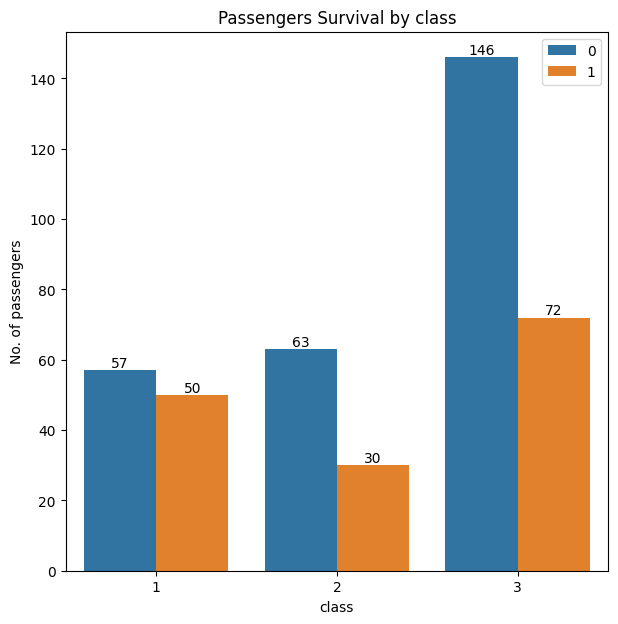

In [23]:
fig = plt.figure(figsize =(7, 7))
ax = sns.countplot(data = df , x = 'Pclass' ,hue = 'Survived')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Passengers Survival by class')
plt.xlabel('class')
plt.ylabel('No. of passengers')
plt.legend()
 

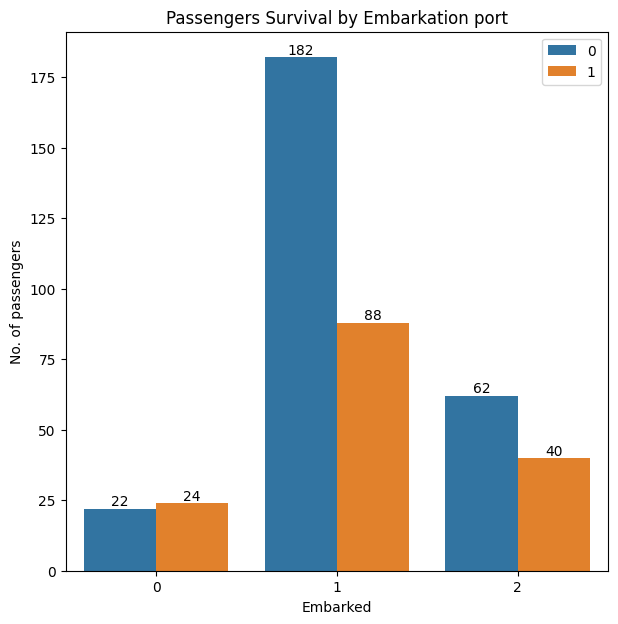

In [24]:
fig = plt.figure(figsize =(7, 7))
ax = sns.countplot(data = df , x = 'Embarked' ,hue = 'Survived')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Passengers Survival by Embarkation port')
plt.xlabel('Embarked')
plt.ylabel('No. of passengers')
plt.legend()

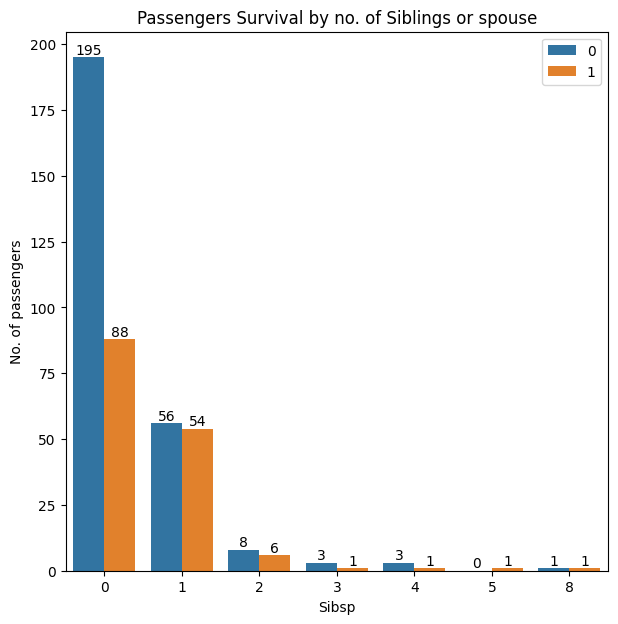

In [25]:
fig = plt.figure(figsize =(7, 7))
ax = sns.countplot(data = df , x = 'SibSp' ,hue = 'Survived')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Passengers Survival by no. of Siblings or spouse')
plt.xlabel('Sibsp')
plt.ylabel('No. of passengers')
plt.legend()

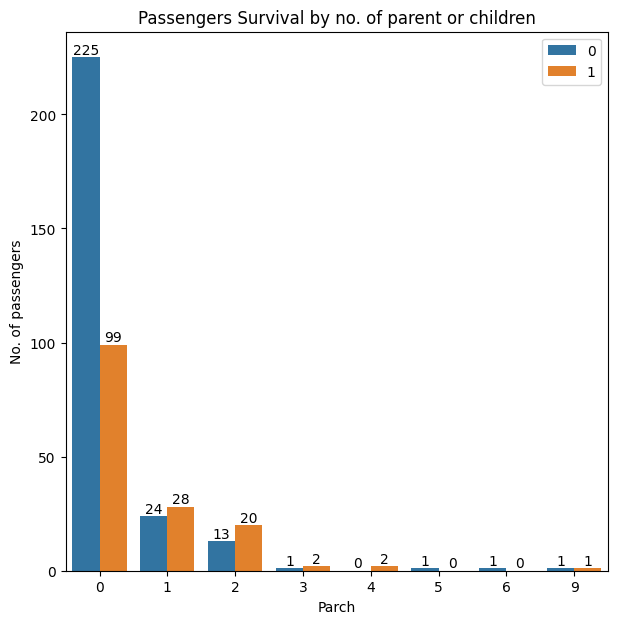

In [26]:
fig = plt.figure(figsize =(7, 7))
ax = sns.countplot(data = df , x = 'Parch' ,hue = 'Survived')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Passengers Survival by no. of parent or children')
plt.xlabel('Parch')
plt.ylabel('No. of passengers')
plt.legend()

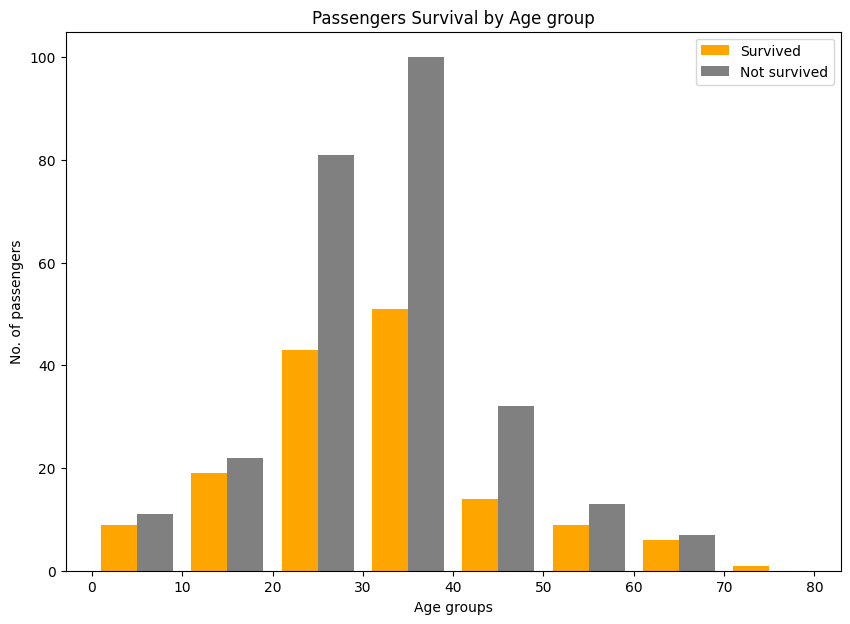

In [27]:
fig = plt.figure(figsize =(10, 7))
ax = plt.hist(x = [df[df['Survived']==1]['Age'],df[df['Survived']==0]['Age']],bins=[0,10,20,30,40,50,60,70,80],color = ['orange','grey'],label = ['Survived','Not survived'])
plt.title('Passengers Survival by Age group')
plt.xlabel('Age groups')
plt.ylabel('No. of passengers')
plt.legend()
 


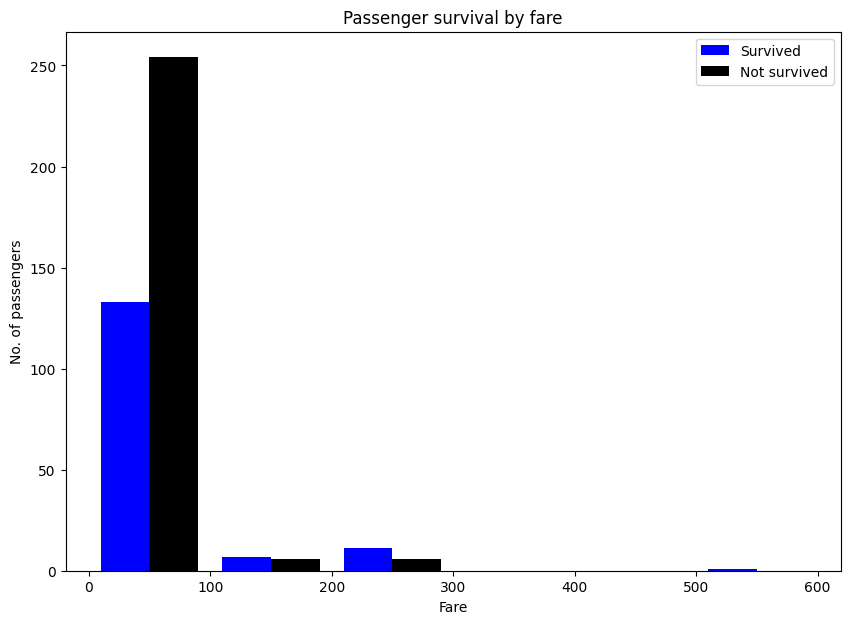

In [28]:
fig = plt.figure(figsize =(10, 7))
plt.hist(x = [df[df['Survived']==1]['Fare'], df[df['Survived']==0]['Fare']],bins =[0,100,200,300,400,500,600], color = ['blue','black'],label = ['Survived','Not survived'])
plt.title('Passenger survival by fare')
plt.xlabel('Fare')
plt.ylabel('No. of passengers')
plt.legend()

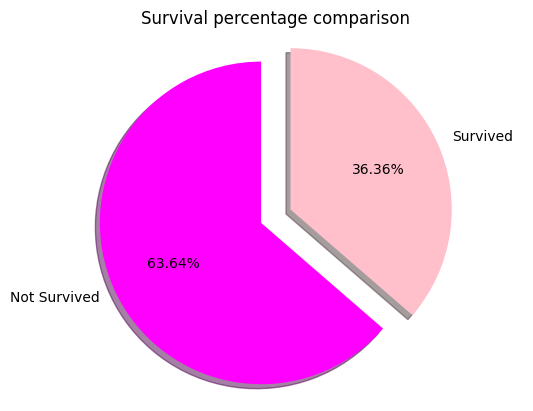

In [29]:
survival_counts = df['Survived'].value_counts()
labels= ['Not Survived','Survived']

colors=['magenta','pink']

plt.pie(survival_counts,labels=labels, colors=colors, startangle=90,shadow=True, explode=(0.1,0.1),autopct='%1.2f%%')

plt.axis('equal')
plt.title('Survival percentage comparison')

plt.show()

 <div style="text-align:center;margin:40px;" >
    <span style="border:3px solid black; padding:10px;color:white;margin:10px;font-size:100%;display:fill;border-radius:30px;overflow:hidden; color:blue;font-weight:bold; font-size:40px;"> STEP-5 : Splitting the data</span>
</div>


In [30]:
Train = df.drop('Survived', axis=1)
Test = df['Survived']
x_train, x_test, y_train, y_test = train_test_split(Train, Test, test_size = 0.1, random_state =1)

In [31]:
print("x_train : ", x_train.shape)
print("x_test : ", x_test.shape)
print("y_train : ", y_train.shape) 
print("y_test : ", y_test.shape) 

x_train :  (376, 6)
x_test :  (42, 6)
y_train :  (376,)
y_test :  (42,)


 <div style="text-align:center;margin:40px;" >
    <span style="border:3px solid black; padding:10px;color:white;margin:10px;font-size:100%;display:fill;border-radius:30px;overflow:hidden; color:blue;font-weight:bold; font-size:40px;"> STEP-6 : Model Building</span>
</div>

In [32]:
LR = LogisticRegression(solver='liblinear', max_iter=200)
LR.fit(x_train, y_train)
y_pred = LR.predict(x_test)

In [33]:
cr= classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.75      0.97      0.85        31
           1       0.50      0.09      0.15        11

    accuracy                           0.74        42
   macro avg       0.62      0.53      0.50        42
weighted avg       0.68      0.74      0.66        42



In [34]:
LRAcc = accuracy_score(y_pred,y_test)
print('Logistic regression accuracy: {:.2f}%'.format(LRAcc*100))
LR.predict_proba([[2,50,1,0,7,0]])

Logistic regression accuracy: 73.81%


array([[0.60601486, 0.39398514]])

In [35]:
sv_m=SVC()
sv_m.fit(x_train,y_train)
y_prd=sv_m.predict(x_test)
print(classification_report(y_test, y_prd))
print(confusion_matrix(y_test, y_prd))
SVCacc = accuracy_score(y_test,y_prd)
print('SVC accuracy: {:.2f}%'.format(SVCacc*100))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85        31
           1       0.00      0.00      0.00        11

    accuracy                           0.74        42
   macro avg       0.37      0.50      0.42        42
weighted avg       0.54      0.74      0.63        42

[[31  0]
 [11  0]]
SVC accuracy: 73.81%


<span style="display:fill;overflow:hidden; color:darkViolet;font-size:30px;font-weight:bold;">MODEL ACCURACY ACHIEVED: <span style="color:purple;font-size:30px;font-weight:bold">74 %</span></span>

 <div style="text-align:center;margin:40px;" >
    <span style="border:3px solid black; padding:10px;color:white;margin:10px;font-size:100%;display:fill;border-radius:30px;overflow:hidden; color:blue;font-weight:bold; font-size:40px;"> STEP-7 : Making Prediction using model</span>
</div>

In [36]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
0,0,3,34,0,0,7,0
1,1,3,47,1,0,7,1
2,0,2,62,0,0,9,0
3,0,3,27,0,0,8,1
4,1,3,22,1,1,12,1
...,...,...,...,...,...,...,...
413,0,3,30,0,0,8,1
414,1,1,39,0,0,108,2
415,0,3,38,0,0,7,1
416,0,3,30,0,0,8,1


In [37]:
prediction= LR.predict((np.array([[2,30,1,0,100,0]])))
print("0 = Not survived , 1 = survived")
print("Passenger prediction : ",prediction)

0 = Not survived , 1 = survived
Passenger prediction :  [1]


<div style="padding:15px;color:white;font-size:100%;text-align:center;display:fill;overflow:hidden;">
   <b> <span style='color:red; font-size:30px;'>Made by Sagar Thora</span></b>
</div>